<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 2: Discrete-Time Systems<br/>
    <small>Date: 1/19/2023</small><br/>
    <small>Section:<s/small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 Ruixiang Wang | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**: *One-sided, with cover sheet, answers are in the same order as questions in the lab*||||
|**Ability to process given signals (20 pts)**: *Import signal, plot signal, filter signal*||||
|**Understanding and ability to implement difference equations (60 pts)**: *Draw system diagram, calculate impulse response, find inverse system answer ’discuss/explain’ questions*||||
|**Ability to test for linearity and time-invariance of systems (20 pts)**: *Supporting plots with clear indication of the proof*||||

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [44]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<StemContainer object of 3 artists>

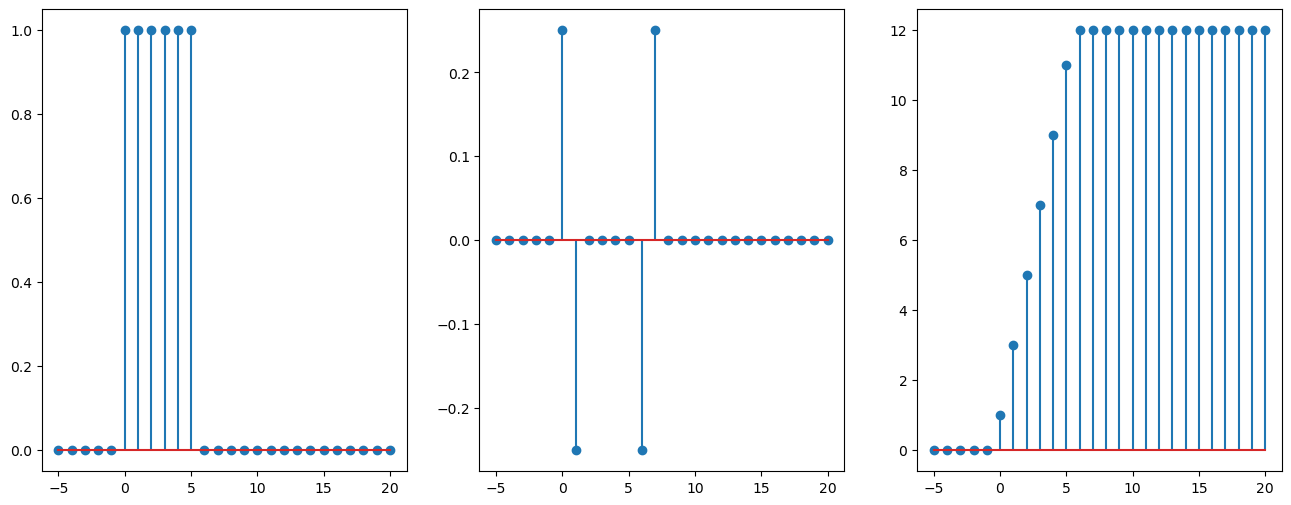

In [45]:
import math

n = np.linspace(-5, 20, 26)

def func_x (n, Num):
    x = (n >= Num).astype(float) - (n >= (Num + 6)).astype(float)
    return x

y1 = (func_x(n, 0) - 2*func_x(n, 1) + func_x(n, 2))/4
y2 = [0] * 26
x = func_x(n, 0)
y2[0] = x[0]

for i in range(1, 26, 1):
    y2[i] = y2[i - 1] + x[i] + x[i-1]

plt.subplot(1, 3, 1)
plt.stem(n, func_x(n,0))
plt.subplot(1, 3, 2)
plt.stem(n, y1)
plt.subplot(1, 3, 3)
plt.stem(n, y2)

<StemContainer object of 3 artists>

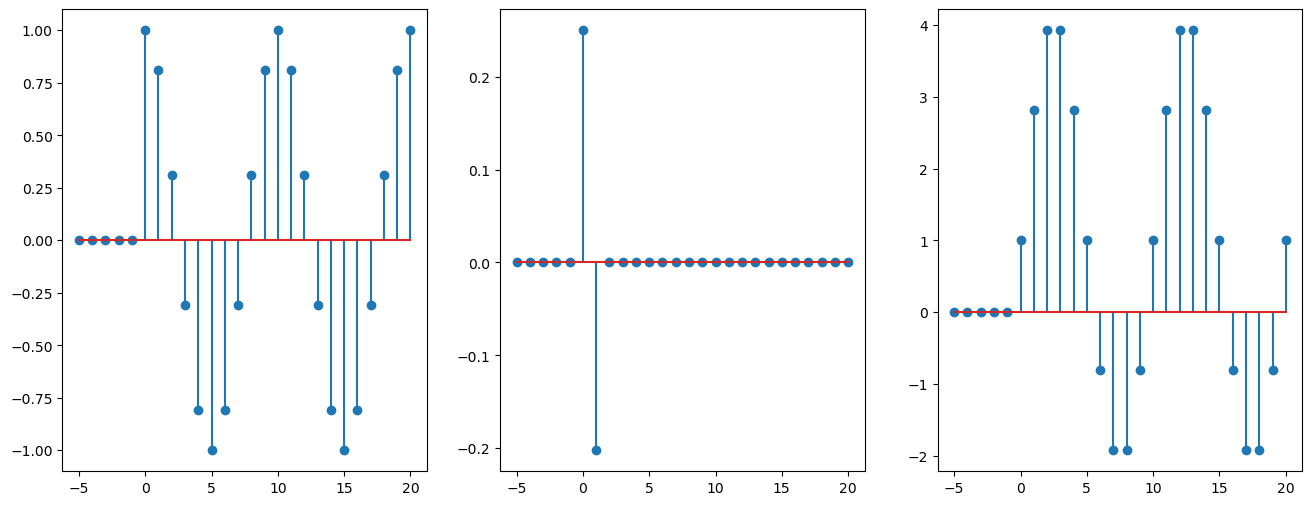

In [32]:
n = np.linspace(-5, 20, 26)

def func_x (n, Num):
    x = (n >= Num).astype(float)* np.cos(math.pi * n / 5)
    return x

y1 = (func_x(n, 0) - 2*func_x(n, 1) + func_x(n, 2))/4
y2 = [0] * 26
x = func_x(n, 0)
y2[0] = x[0]

for i in range(1, 26, 1):
    y2[i] = y2[i - 1] + x[i] + x[i-1]

plt.subplot(1, 3, 1)
plt.stem(n, func_x(n,0))
plt.subplot(1, 3, 2)
plt.stem(n, y1)
plt.subplot(1, 3, 3)
plt.stem(n, y2)

<h3 style="color:red;"><left>Exercise 2</left></h3>

**1. Draw the block diagram of the discrete-time differentiator as in Figure 1.**

<img src="ECE 43800- lab2.png">

**2. Apply the discrete-time differentiator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

<StemContainer object of 3 artists>

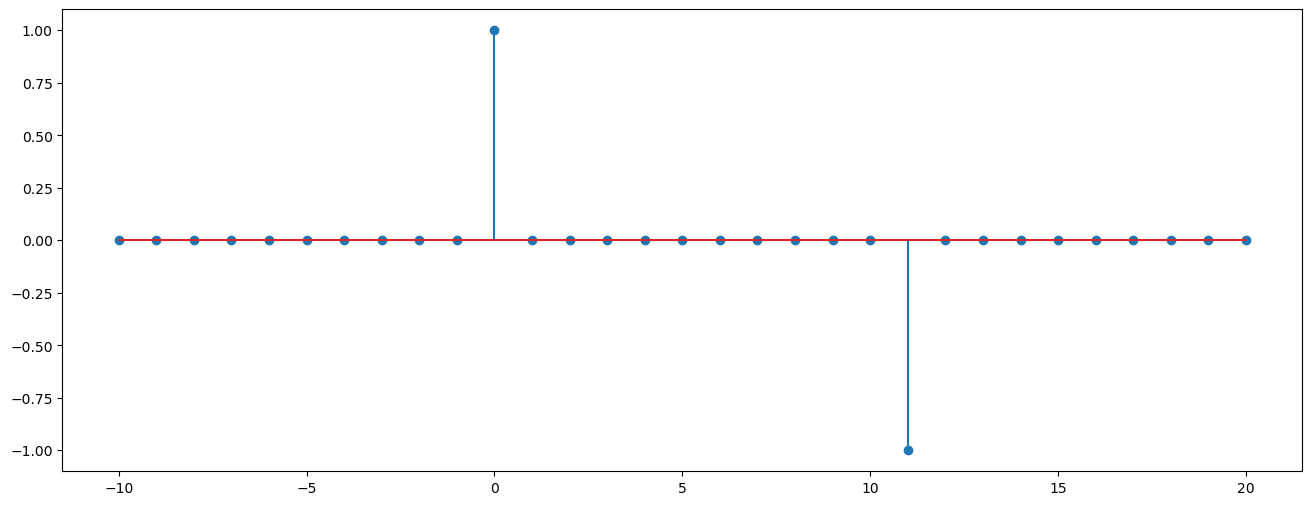

In [28]:
import math

n = np.linspace(-10, 20, 31)

def func_x (n, Num):
    x = (n >= Num).astype(float) - (n >= (Num + 11)).astype(float)
    return x

y = func_x(n, 0) - func_x(n, 1)

plt.stem(n, y)

**3. Draw the block diagram of the discrete-time integrator as in Figure 1.**

<img src="ECE 43800- lab2 integrator.drawio.png">

**4. Apply the discrete-time integrator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

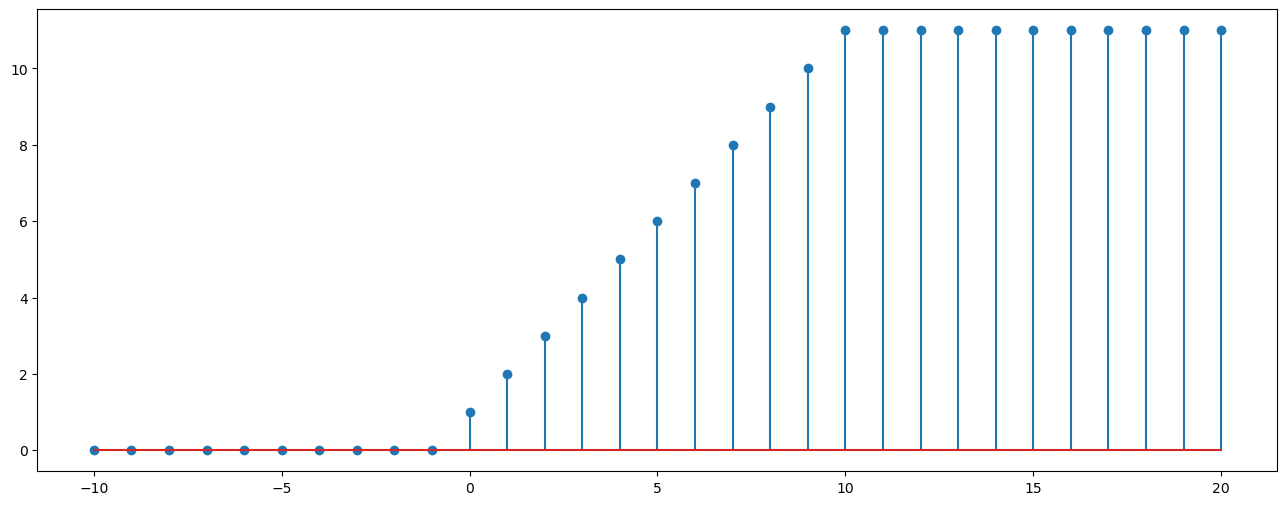

In [29]:
def func_z (n, x):
    z = (func_z(n, x) >= 1).astype(float) + x
    return z

z = [0] * 31
x = func_x(n, 0)
z[0] = x[0]

for i in range(1, 31, 1):
    z[i] = z[i - 1] + x[i]

plt.stem(n, z)
plt.show()

**5. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.1$.**

<StemContainer object of 3 artists>

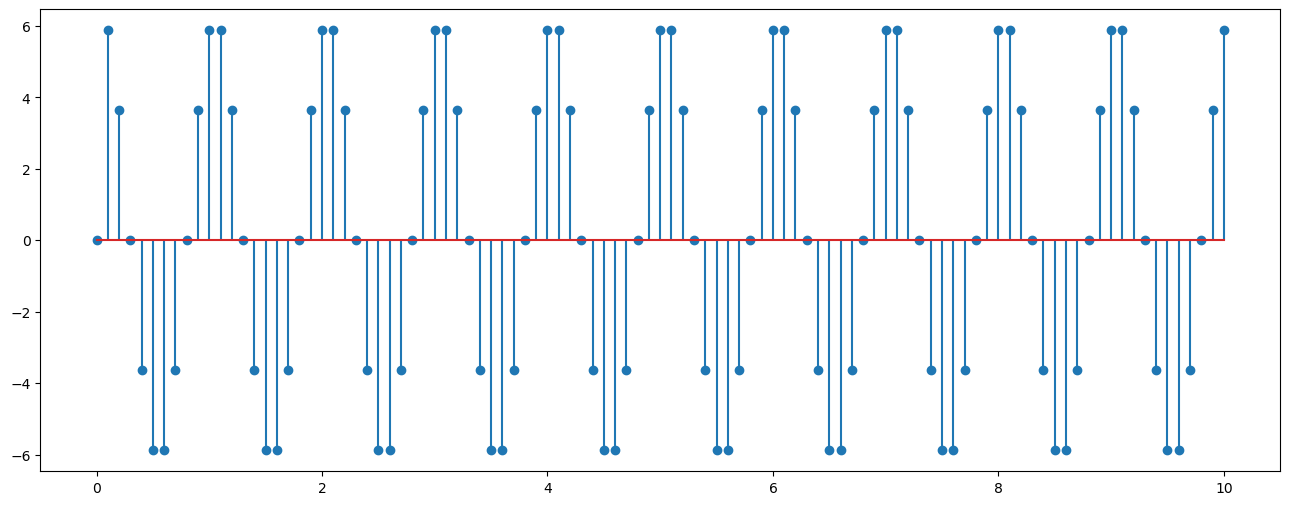

In [73]:
T = 0.1
N = 10/0.1 +1

n = np.linspace(0, 10, 101)

x = np.sin(2*math.pi*n)
for i in range(1, 101, 1):
    y[i] = 10*(x[i] - x[i-1])

plt.stem(n, y)

**6. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.001$.**

In [81]:
n = np.linspace(0, 10, 10001)

x1 = np.sin(2*math.pi*n)
for i in range(0, 10001, 1):
    z[i] = 1000*(x1[i] - x1[i-1])

plt.stem(n, z)

IndexError: list assignment index out of range

**7. Compare the results in Q5 and Q6.**

Q6 result is more detailed

<h3 style="color:red;"><left>Exercise 3</left></h3>

**1. For each of these five systems, do the following:**

* $S_1$
* $S_2$
* $S_1(S_2)$ (i.e., the series connection with $S_1$ following $S_2$)
* $S_2(S_1)$ (i.e., the series connection with $S_2$ following $S_1$)
* $S_1+S_2$

**i. Draw the system diagram (use only delays, multiplications, and additions as in Figure 1)**

insert your diagrams here

**ii. Write code to implement each of these two filters ($S_1, S_2$) in the following functions using the following syntax**
```python
def S1(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

and 
```python
def S2(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [7]:
# write your code here


**iii. Write code to calculate the impulse response of each of the five systems, and plot the impulse response of each of these five systems:**

In [8]:
# write your code here


**2. Use the command ```audio, fs = sf.read("music.au")``` to load the file ```music.au``` into Python. The first variable ```audio``` is the signal, and the second variable ```fs``` is the sampling rate.**

In [9]:
# write your code here


**3. Play the audio file using the command `ipd.Audio(audio, rate=fs)`.**

In [10]:
# write your code here


**4. Next, filter the audio signal with each of the two systems $S_1$ and $S_2$ and listen to each of their outputs.**

In [11]:
# write your code here


**5. How do the filters change the sound of the audio signals? Explain your observations.**

write your answer here

<h3 style="color:red;"><left>Exercise 4</left></h3>

**1. Consider the system $y=S_2[x]$ from Section 3. Find a difference equation for a new system $y=S_3[x]$ such that $\delta=S_3[S_2[\delta]]$ where $\delta$ denotes the discrete-time impulse function $\delta(n)$. Since both systems $S_2$ and $S_3$ are LTI, the time-invariance and superposition properties can be used to obtain $x=S_3[S_2[x]]$ for *any* discrete-time signal $x$. We say that the systems $S_3$ and $S_2$ are inverse filters because they cancel out the effects of each other.**

**Hint:** The system $y=S_3[x]$ can be described by the difference equation

\begin{equation}
    y[n]=ax[n]+bx[n-1]
\end{equation}

where $a$ and $b$ are constants.

write your answer here

**2. Complete the Python function using the following syntax.**
```python
def S3(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [12]:
# write your code here


**3. Write code to plot the impulse response of both $S_3$ and $S_3[S_2[\delta]]$ below.**

In [13]:
# write your code here


<h3 style="color:red;"><left>Exercise 5</left></h3>

Often it is necessary to determine if a system is linear and/or time-invariant. If the inner workings of a system are not known, this task is impossible because the linearity and time-invariance properties must hold true for all possible input signals. However, it is possible to show that a system is non-linear or time-varying because only a single instance must be found where the properties are violated.

The code in the cell below is the synatx for the three imported black boxes, ```bbox1```, ```bbox2``` and ```bbox3```. All of them have the same syntax
```python
def bboxN(x):
    return y
```
where ```x``` and ```y``` are the input and the output signals, and ```N=1,2,3```. **Exactly one of these systems is non-linear, and exactly one of them is time-varying.** Your task is to find the non-linear system and the time-varying system.

**Hints:** 
* You should try a variety of input signals until you find a counter-example.
* When testing for time-invariance, you need to look at the responses to a signal and to its delayed version. Since all your signals in Python have a finite duration, you should be very careful about shifting signals. In particular, if you want to shift a signal $x$ by $M$ samples to the left, $x$ should start with at least $M$ zeros. If you want to shift $x$ by $M$ samples to the right, $x$ should end with at least $M$ zeros.
* When testing for linearity, you may find that simple inputs such as the unit impulse do not accomplish the task. In this case, you should try something more complicated like a sinusoid or a random signal generated with the ```x = np.random.rand(N)``` command, where ```N``` here is the length of the signal.

**1. Import the three bbboxes from the file ```bboxes.py```.**

In [14]:
# write your code here


**2. Write code to plot input/output signal pairs that support your conclusions. Create multiple code cells if necessary.**

In [15]:
# write your code here


**2. State which system is non-linear and which system is time-varying.**


write your answer here

**3. Explain how the plots support your conclusion.**

write your answer here

<h3 style="color:red;"><left>Exercise 6.1</left></h3>

**For each of these three methods:**

**1. write a difference equation**

write your answer here

**2. Draw a system diagram**

insert your diagram here

**3. Calculate the impulse response**

write your answer here

**4. Explain why methods (5) and (7) are known as moving average.**

write your answer here

<h3 style="color:red;"><left>Exercise 6.2</left></h3>

Load the file ```stockrates.npy``` into Python. This file contains a vector of daily stock market exchange rates for a publicly-traded stock.

Apply filters (6) and (7) to smooth the stock values. When you apply filter (6), you will need to initialize the value of *averagevalue(yesterday)*. Use an initial value of $0$. Similarly, in filter (7), set the initial values of the *value* vector to $0$ (for the days prior to the start of data collection).

**Note: You will need the following code to load data that is stored in a `.npy` file.**

In [16]:
rate = np.load("stockrates.npy")

**1. Plot the original stock values.**

In [17]:
# write your code here


**2. Plot the result of filtering with (6).**

In [18]:
# write your code here


**3. Plot the result of filtering with (7).**

In [19]:
# write your code here


**4. Discuss the advantages and disadvantages of the two filters (6) and (7). Can you suggest a better method for initializing the filter outputs?**.

write your answer here